# Unión de tabla de Sentimiento y valores de coinmarketcap día a día 

In [ ]:
#%%capture
from crypto import Crypto
bitcoin = Crypto('bitcoin', config_file ='config_1d_bitcoin.json') #Init Class
bitcoin.sent_data_clean()   #Clean CSV sentiment
bit = bitcoin.merge_tables()      #Merge sentiment + OHLCVicti ictiotables

In [ ]:
#%%capture
from crypto import Crypto
ethereum = Crypto('ethereum', config_file = 'config_1d_ethereum.json')
ethereum.sent_data_clean()
eth = ethereum.merge_tables()

In [1]:
import pandas as pd
bit = pd.read_csv('./databases/bitcoin_5min_clean.csv', index_col = 0)
eth = pd.read_csv('./databases/ethereum_5min_clean.csv', index_col= 0)

In [2]:
bit.head()
eth.head()

Open    High     Low   Close      Volume  \
Date                                                              
2018-01-01 03:40:00  731.63  733.00  730.75  733.00  287.533001   
2018-01-01 03:45:00  732.98  732.99  731.51  732.52  189.330389   
2018-01-01 03:50:00  731.65  732.99  730.01  730.98  373.910910   
2018-01-01 03:55:00  730.77  731.60  730.04  731.30  124.003271   
2018-01-01 04:00:00  731.08  732.98  731.08  732.44  119.415399   

                     Close_off_high  Volatility_HLO  Volatility        Mean  
Date                                                                         
2018-01-01 03:40:00       -1.000000        0.003075    4.096143  727.295778  
2018-01-01 03:45:00       -0.364865        0.002019    4.013641  727.244667  
2018-01-01 03:50:00        0.348993        0.004073    4.004472  727.235556  
2018-01-01 03:55:00       -0.615385        0.002135    3.982991  727.216889  
2018-01-01 04:00:00       -0.431579        0.002599    4.045171  727.282667

In [3]:
from crypto import Exchanges

In [4]:
Exchanges(bit,'bt', eth, 'eth').merge(save_file = 'exchanges_5m.csv')

/home/toku/crypto-learning/crypto.py:179: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  self.exchanges = self.exchanges.reindex_axis(sorted(self.exchanges.columns), axis=1)


                         Close_bt  Close_eth  Close_off_high_bt  \
Date                                                              
2018-01-01 03:40:00  13469.257068     733.00           0.336107   
2018-01-01 03:45:00  13451.000000     732.52           0.600000   
2018-01-01 03:50:00  13391.000000     730.98           0.311111   
2018-01-01 03:55:00  13394.000000     731.30          -0.179487   
2018-01-01 04:00:00  13378.000000     732.44           0.840000   

                     Close_off_high_eth  High_bt  High_eth   Low_bt  Low_eth  \
Date                                                                           
2018-01-01 03:40:00           -1.000000  13506.0    733.00  13451.0   730.75   
2018-01-01 03:45:00           -0.364865  13495.0    732.99  13440.0   731.51   
2018-01-01 03:50:00            0.348993  13450.0    732.99  13360.0   730.01   
2018-01-01 03:55:00           -0.615385  13410.0    731.60  13371.0   730.04   
2018-01-01 04:00:00           -0.431579  13424.0  

# Predicciones

In [23]:
%load_ext autoreload
%autoreload 2
from predictor import Cryptopredict as cp
bitcoin = cp('ethereum', config_file = 'config_5min_ethereum.json')
models = bitcoin.load_models()
predictions = bitcoin.predict(models)
predictions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/toku/crypto-learning/predictor.py:31: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)
/home/toku/crypto-learning/predictor.py:142: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)


Close_eth  Close_off_high_eth   Mean_eth  \
Date                                                            
2018-12-12 01:25:00  88.991600            0.244349  88.546799   
2018-12-12 01:30:00  89.042992            0.155668  88.546219   
2018-12-12 01:35:00  88.921982            0.001780  88.545631   
2018-12-12 01:40:00  89.009529            0.005981  88.507370   
2018-12-12 01:45:00  88.883423           -0.064051  88.517624   
2018-12-12 01:50:00  89.014404           -0.118071  88.524971   
2018-12-12 01:55:00  88.966972           -0.140708  88.540306   
2018-12-12 02:00:00  88.990845           -0.150022  88.524399   
2018-12-12 02:05:00  88.988144           -0.237218  88.546417   
2018-12-12 02:10:00  88.985687           -0.363255  88.547691   
2018-12-12 02:15:00  88.912086           -0.480802  88.580467   
2018-12-12 02:20:00  88.968765           -0.544827  88.591385   
2018-12-12 02:25:00  89.001785           -0.654371  88.581329   
2018-12-12 02:30:00  89.044464           -0.695294  88.544487   
2018-12-12 02:35:00  89.109642           -0.837028  88.549644   

                     Volatility_HLO_eth  Volatility_eth    Volume_eth  
Date                                                                   
2018-12-12 01:25:00            0.001040        0.699225   2620.537354  
2018-12-12 01:30:00            0.000978        0.710822   8408.894531  
2018-12-12 01:35:00            0.000929        0.727450  10145.492188  
2018-12-12 01:40:00            0.000581        0.711112  11376.244141  
2018-12-12 01:45:00            0.000704        0.700630  12178.282227  
2018-12-12 01:50:00            0.000846        0.664749   7735.186035  
2018-12-12 01:55:00            0.001054        0.670055   3842.833008  
2018-12-12 02:00:00            0.000677        0.666715   9048.367188  
2018-12-12 02:05:00            0.000974        0.664619   3692.553223  
2018-12-12 02:10:00            0.000986        0.655293   7344.047363  
2018-12-12 02:15:00            0.001495        0.632065   9327.046875  
2018-12-12 02:20:00            0.001788        0.644586   4568.220215  
2018-12-12 02:25:00            0.001636        0.600497   5206.577148  
2018-12-12 02:30:00            0.001096        0.619814   3051.531982  
2018-12-12 02:35:00            0.001314        0.604022   2847.036133

In [26]:
%load_ext autoreload
%autoreload 2
from predictor import Cryptopredict as cp
bitcoin = cp('bitcoin', config_file = 'config_5min_bitcoin.json')
models = bitcoin.load_models()
predictions = bitcoin.predict(models)
predictions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/toku/crypto-learning/predictor.py:31: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)
/home/toku/crypto-learning/predictor.py:142: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)


Close_bt  Close_off_high_bt      Mean_bt  \
Date                                                               
2018-12-12 01:30:00  3418.481689           0.876725  3426.687500   
2018-12-12 01:35:00  3420.467529           0.787581  3427.902832   
2018-12-12 01:40:00  3426.453613           0.780190  3428.311035   
2018-12-12 01:45:00  3428.673584           0.805399  3428.957031   
2018-12-12 01:50:00  3426.328613           0.798164  3427.538574   
2018-12-12 01:55:00  3425.363037           0.766410  3428.213135   
2018-12-12 02:00:00  3423.677979           0.783176  3428.218262   
2018-12-12 02:05:00  3424.646240           0.807817  3427.880859   
2018-12-12 02:10:00  3423.568115           0.777171  3427.971680   
2018-12-12 02:15:00  3422.752197           0.804376  3428.868896   
2018-12-12 02:20:00  3423.537109           0.728804  3428.728516   
2018-12-12 02:25:00  3425.954590           0.765706  3427.396973   
2018-12-12 02:30:00  3427.352295           0.739235  3427.288574   
2018-12-12 02:35:00  3422.100830           0.688372  3427.087402   
2018-12-12 02:40:00  3426.392090           0.633487  3426.943604   

                     Volatility_HLO_bt  Volatility_bt   Volume_bt  
Date                                                               
2018-12-12 01:30:00           0.000417      12.632998  294.983490  
2018-12-12 01:35:00           0.000698      12.106188  361.449646  
2018-12-12 01:40:00           0.000779      11.361938  134.930420  
2018-12-12 01:45:00           0.000796      10.693081  164.740082  
2018-12-12 01:50:00           0.000597      10.363520  203.801422  
2018-12-12 01:55:00           0.000843      10.002433  376.624420  
2018-12-12 02:00:00           0.000782       9.779276  295.982758  
2018-12-12 02:05:00           0.000747       9.681005  173.815277  
2018-12-12 02:10:00           0.000650       9.670814  409.417725  
2018-12-12 02:15:00           0.000961       9.745090  285.123474  
2018-12-12 02:20:00           0.000937       9.742550  331.367645  
2018-12-12 02:25:00           0.000493       9.582258  163.549149  
2018-12-12 02:30:00           0.000608       9.771620  218.531311  
2018-12-12 02:35:00           0.000414       9.669244  379.559998  
2018-12-12 02:40:00           0.000448       9.831218  127.868874

In [ ]:
from predictor import Cryptopredict as cp

'''
ethereum_5m = cp('ethereum', config_file = 'config_5min_ethereum.json')
models = ethereum_5m.load_models()
predictions = ethereum_5m.predict(models)
print(predictions)

bitcoin_5m = cp('bitcoin', config_file = 'config_5min_bitcoin.json')
models = bitcoin_5m.load_models()
predictions = bitcoin_5m.predict(models)
print(predictions)

bt_eth_5m = cp(config_file = 'config_5min.json')
models = bt_eth_5m.load_models()
predictions = bt_eth_5m.predict(models)
print(predictions)
'''
ethereum_1d = cp('ethereum', config_file = 'config_1d_ethereum.json')
models = ethereum_1d.load_models()
predictions = ethereum_1d.predict(models)
print(predictions)

bitcoin_1d = cp('bitcoin', config_file = 'config_1d_bitcoin.json')
models = bitcoin_1d.load_models()
predictions = bitcoin_1d.predict(models)
print(predictions)

bt_eth_1d = cp(config_file = 'config_1d.json')
models = bt_eth_1d.load_models()
predictions = bt_eth_1d.predict(models)
print(predictions)

In [28]:
%load_ext autoreload
%autoreload 2
from predictor import Cryptopredict as cp
bitcoin = cp(config_file = 'config_5min.json')
models = bitcoin.load_models()
predictions = bitcoin.predict(models)
predictions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/toku/crypto-learning/predictor.py:31: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)
/home/toku/crypto-learning/predictor.py:142: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)


Close_bt  Close_eth  Close_off_high_bt  \
Date                                                             
2018-12-12 01:35:00  3426.306152  88.542946           0.410480   
2018-12-12 01:40:00  3430.463135  88.453590           0.531485   
2018-12-12 01:45:00  3425.884033  88.546875           0.302279   
2018-12-12 01:50:00  3428.522949  88.628639          -0.034649   
2018-12-12 01:55:00  3430.732422  88.507240          -0.196765   
2018-12-12 02:00:00  3434.359131  88.457062          -0.096744   
2018-12-12 02:05:00  3430.119629  88.453285          -0.185776   
2018-12-12 02:10:00  3431.605225  88.431831          -0.660161   
2018-12-12 02:15:00  3432.790283  88.391983          -0.629940   
2018-12-12 02:20:00  3431.286377  88.445900          -0.766242   
2018-12-12 02:25:00  3432.333008  88.424416          -0.815680   
2018-12-12 02:30:00  3431.148926  88.508499          -0.742316   
2018-12-12 02:35:00  3431.740234  88.466644          -0.927542   
2018-12-12 02:40:00  3427.807617  88.393532          -0.788520   
2018-12-12 02:45:00  3427.321777  88.419632          -0.961593   

                     Close_off_high_eth      Mean_bt   Mean_eth  \
Date                                                              
2018-12-12 01:35:00           -0.895400  3431.771973  89.021103   
2018-12-12 01:40:00           -0.936912  3438.570557  89.057579   
2018-12-12 01:45:00           -0.883304  3440.684082  89.079399   
2018-12-12 01:50:00           -0.848967  3435.207031  89.104523   
2018-12-12 01:55:00           -0.915319  3432.117188  89.132484   
2018-12-12 02:00:00           -0.909795  3432.470947  89.154907   
2018-12-12 02:05:00           -0.948007  3431.175293  89.093086   
2018-12-12 02:10:00           -0.951139  3432.368896  88.991531   
2018-12-12 02:15:00           -0.969523  3429.981445  89.044769   
2018-12-12 02:20:00           -0.944233  3437.205566  89.000221   
2018-12-12 02:25:00           -0.954886  3431.462158  88.865616   
2018-12-12 02:30:00           -0.908791  3434.129639  88.788971   
2018-12-12 02:35:00           -0.941836  3431.517822  88.789406   
2018-12-12 02:40:00           -0.966410  3432.173584  88.758034   
2018-12-12 02:45:00           -0.953161  3432.663574  88.691628   

                     Volatility_HLO_bt  Volatility_HLO_eth  Volatility_bt  \
Date                                                                        
2018-12-12 01:35:00           0.007713            0.001150      10.319365   
2018-12-12 01:40:00           0.008036            0.000101      14.124536   
2018-12-12 01:45:00           0.007331            0.000649      14.463852   
2018-12-12 01:50:00           0.005419            0.001499      13.981684   
2018-12-12 01:55:00           0.006522            0.001201      12.587351   
2018-12-12 02:00:00           0.005232            0.000810      10.993186   
2018-12-12 02:05:00           0.005605            0.000683      12.290174   
2018-12-12 02:10:00           0.003747            0.001052      12.810287   
2018-12-12 02:15:00           0.003458            0.000629      11.304894   
2018-12-12 02:20:00           0.002207            0.000587      12.672273   
2018-12-12 02:25:00           0.002983            0.000795      11.387784   
2018-12-12 02:30:00           0.004146            0.001096      12.160827   
2018-12-12 02:35:00           0.002307            0.001119      12.977857   
2018-12-12 02:40:00           0.003072            0.000903      11.487926   
2018-12-12 02:45:00           0.001285            0.000670      12.617511   

                     Volatility_eth   Volume_bt   Volume_eth  
Date                                                          
2018-12-12 01:35:00        0.727334  175.077637  1978.109985  
2018-12-12 01:40:00        0.724119  199.344467   976.694885  
2018-12-12 01:45:00        0.715251  149.500320  1556.470215  
2018-12-12 01:50:00        0.647754  151.936798  2270.910889  
2018-12-12 01:55:00        0.627690  194.953979  1719.042480  
2018-12-12

In [ ]:
predictions, recurrent_predictions = bitcoin.predict(models)
print(predictions, recurrent_predictions)

In [ ]:
%load_ext autoreload
%autoreload 2
from predictor import Cryptopredict as cp
bitcoin = cp('bitcoin', config_file = 'config_1d_bitcoin.json')
models = bitcoin.load_models(prediction_len = 15)
predictions, recurrent_predictions = bitcoin.predict(models)

# Network

## Trainer

In [1]:
def create_h5():
    bitcoin = (Trainer('config_5min_ethereum.json', 1))
    bitcoin.create_h5_file()##200y#512batch#mm es 0-1 #std -1-1 256 60#stdize-1-1 20051
def create_h5_eth():
    
    ethereum = (Trainer('config_5min_bitcoin.json', 1))
    ethereum.create_h5_file()
    
    

In [3]:
%load_ext autoreload
%autoreload 2
from cryptrend import Trainer
import threading
#Trainer('config_5min_ethereum.json', 1).create_h5_file()
#Trainer('config_5min_bitcoin.json', 1).create_h5_file()
t = threading.Thread(target=create_h5)
t.start()
t1 = threading.Thread(target = create_h5_eth)
t1.start()
bitcoin = Trainer('config_5min.json', 1)
bitcoin.create_h5_file()##200y#512batch#mm es 0-1 #std -1-1 256 60#stdize-1-1 20051
#bitcoin.fit_crypto(save_period = 1, load = False)
#bitcoin.plot_history()
#bitcoin.clean()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'create_h5' is not defined

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
x <HDF5 dataset "x": shape (97950, 60, 12), type "<f4"> 
y <HDF5 dataset "y": shape (97950, 1, 12), type "<f4">
> Clean data has 97950 data rows. Training on 88155 rows with 146 steps-per-epoch Test on 9795 rows with 16 steps
Epoch 1/20
146/146 [==============================] - 52s 359ms/step - loss: 0.0497 - acc: 0.4933 - val_loss: 0.0679 - val_acc: 0.4332

Epoch 00001: val_loss improved from inf to 0.06791, saving model to ./databases/1/model_saved_exchanges_5m_1.h5
Epoch 2/20
146/146 [==============================] - 50s 341ms/step - loss: 0.0484 - acc: 0.5000 - val_loss: 0.0692 - val_acc: 0.4319

Epoch 00002: val_loss did not improve from 0.06791
Epoch 3/20
146/146 [==============================] - 50s 341ms/step - loss: 0.0447 - acc: 0.4996 - val_loss: 0.0678 - val_acc: 0.4346

Epoch 00003: val_loss improved from 0.06791 to 0.06779, saving model to ./databases/1/model_saved_exchanges_5m_1.h5

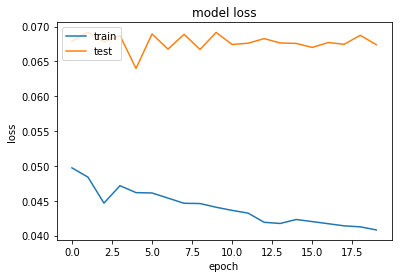

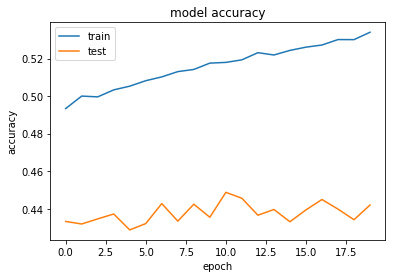

In [4]:
%load_ext autoreload
%autoreload 2
from cryptrend import Trainer
import threading
#Trainer('config_5min_ethereum.json', 1).create_h5_file()
#Trainer('config_5min_bitcoin.json', 1).create_h5_file()
#t = threading.Thread(target=create_h5)
#t.start()
bitcoin = Trainer('config_5min.json', 1)
#bitcoin.create_h5_file()##200y#512batch#mm es 0-1 #std -1-1 256 60#stdize-1-1 20051
bitcoin.fit_crypto(save_period = 1, load = True)
bitcoin.plot_history()
bitcoin.clean()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
x <HDF5 dataset "x": shape (97950, 60, 6), type "<f4"> 
y <HDF5 dataset "y": shape (97950, 1, 6), type "<f4">
> Clean data has 97950 data rows. Training on 88155 rows with 146 steps-per-epoch Test on 9795 rows with 16 steps
Epoch 1/20
146/146 [==============================] - 53s 364ms/step - loss: 0.0571 - acc: 0.7227 - val_loss: 0.0608 - val_acc: 0.6688

Epoch 00001: val_loss improved from inf to 0.06080, saving model to ./databases/1/model_saved_bitcoin_5m_1.h5
Epoch 2/20
146/146 [==============================] - 50s 342ms/step - loss: 0.0559 - acc: 0.7290 - val_loss: 0.0617 - val_acc: 0.6735

Epoch 00002: val_loss did not improve from 0.06080
Epoch 3/20
146/146 [==============================] - 50s 343ms/step - loss: 0.0548 - acc: 0.7325 - val_loss: 0.0618 - val_acc: 0.6722

Epoch 00003: val_loss did not improve from 0.06080

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00024749

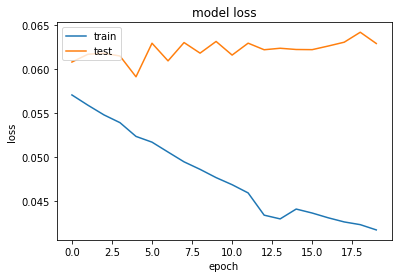

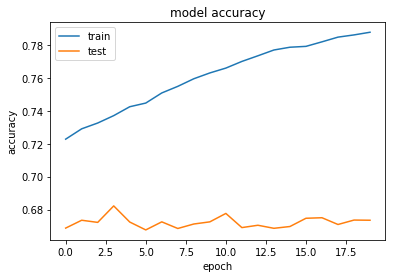

In [5]:
%load_ext autoreload
%autoreload 2
from cryptrend import Trainer
import threading
#Trainer('config_5min_2.json', 1).create_h5_file()
#t = threading.Thread(target=create_h5)
#t.start()
bitcoin = Trainer('config_5min_bitcoin.json', 1)
#bitcoin.create_h5_file()##200y#512batch#mm es 0-1 #std -1-1 256 60#stdize-1-1 20051
bitcoin.fit_crypto(save_period = 1, load = True)
bitcoin.plot_history()
bitcoin.clean()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
x <HDF5 dataset "x": shape (97950, 60, 6), type "<f4"> 
y <HDF5 dataset "y": shape (97950, 1, 6), type "<f4">
> Clean data has 97950 data rows. Training on 88155 rows with 146 steps-per-epoch Test on 9795 rows with 16 steps
Epoch 1/20
146/146 [==============================] - 53s 361ms/step - loss: 0.0409 - acc: 0.7837 - val_loss: 0.0707 - val_acc: 0.6727

Epoch 00001: val_loss improved from inf to 0.07073, saving model to ./databases/1/model_saved_ethereum_5m_1.h5
Epoch 2/20
146/146 [==============================] - 50s 341ms/step - loss: 0.0396 - acc: 0.7873 - val_loss: 0.0724 - val_acc: 0.6673

Epoch 00002: val_loss did not improve from 0.07073
Epoch 3/20
146/146 [==============================] - 50s 340ms/step - loss: 0.0328 - acc: 0.7909 - val_loss: 0.0702 - val_acc: 0.6728

Epoch 00003: val_loss improved from 0.07073 to 0.07017, saving model to ./databases/1/model_saved_ethereum_5m_1.h5
Epo

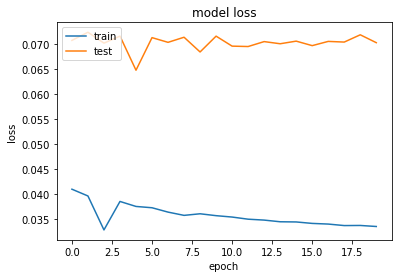

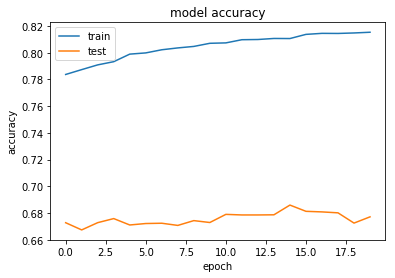

In [6]:
%load_ext autoreload
%autoreload 2
from cryptrend import Trainer
import threading
#Trainer('config_5min_2.json', 1).create_h5_file()
#t = threading.Thread(target=create_h5)
#t.start()
bitcoin = Trainer('config_5min_ethereum.json', 1)
#bitcoin.create_h5_file()##200y#512batch#mm es 0-1 #std -1-1 256 60#stdize-1-1 20051
bitcoin.fit_crypto(save_period = 1, load = True)
bitcoin.plot_history()
bitcoin.clean()

## Predictor

In [ ]:
%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoin_daily = Predictor('config_5min.json',1, to_predict = 'Close_eth')
bitcoin_daily.one_day_prediction()
bitcoin_daily.multiple_days_predict(days = 15, batch_size = 300)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoin_daily = Predictor('config_5min_ethereum.json',1,to_predict='Close_eth')
bitcoin_daily.one_day_prediction()
bitcoin_daily.multiple_days_predict(days = 15,batch_size = 300)

In [ ]:
%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoin_daily = Predictor('config_5min.json',1, to_predict = 'Close_bt')
bitcoin_daily.one_day_prediction()
bitcoin_daily.multiple_days_predict(days = 15, batch_size = 300)

In [ ]:
%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoin_daily = Predictor('config_5min_bitcoin.json',1, to_predict = 'Close_bt')
bitcoin_daily.one_day_prediction()
bitcoin_daily.multiple_days_predict(days = 15, batch_size = 300)

In [ ]:
%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoins = []
for i in range(1,16,1):
    bitcoins.append(Predictor('config_1d_bitcoin.json', i))

#bitcoin_min = Predictor('config_1min.json')
values = []
for bitcoin in bitcoins:
    values.append(bitcoin.one_day_prediction())
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
predictions = []
totalp =[]
for i in range(0,len(values[0][0]),15):
    predictions = []
    y = []
    for j in range(0,len(values),1):
        predictions.append(values[j][0][i])
        y.append(i + j)
    totalp.append(predictions)
    plt.plot(np.array(y), predictions)
#import numpy as np
#plt.plot(np.array(totalp).reshape(130))
plt.plot(values[0][1])
plt.show


%load_ext autoreload
%autoreload 2
from cryptrend import Predictor
bitcoins = []
for i in range(1,16,1):
    bitcoins.append(Predictor('config_5min.json', i))
values = []
for bitcoin in bitcoins:
    values.append(bitcoin.one_day_prediction())
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
predictions = []
totalp =[]
for i in range(0,len(values[0][0]),15):
    predictions = []
    y = []
    for j in range(0,len(values),1):
        predictions.append(values[j][0][i])
        y.append(i + j)
    totalp.append(predictions)
    plt.plot(np.array(y), predictions)
#import numpy as np
#plt.plot(np.array(totalp).reshape(130))
plt.plot(values[0][1])
plt.show

In [ ]:
df = pd.read_csv('./databases/exchanges.csv', index_col=0)
df.head(5)

In [ ]:
import json 
configs = json.loads(open('./config_1d_bitcoin.json').read())

In [ ]:
k = configs['data']['filter_columns']
k=k[:-2]

In [ ]:
list(df.columns).index(k[12])

In [ ]:
k == 'Close_bt'

In [ ]:
list(filter(lambda x : x == 'Close_bt',enumerate(k)))

In [ ]:
k = configs['data']['filter_columns']

In [ ]:
k.index('Close_bt')

In [ ]:
sorted(k)